<a href="https://colab.research.google.com/github/BeautifulTovarisch/statistics-potpourri/blob/main/basic_probability/sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Sets

This notebook covers set laws and their relationship to basic probability.

In [1]:
import Pkg

Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("StatsBase")
Pkg.add("Combinatorics")

using Logging
Logging.disable_logging(Logging.Warn)

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


LogLevel(1001)

## Probability of a Union

Let $A$ and $B$ be events in a sample space. Then

\begin{equation}
  P(A \cup B) = P(A) + P(B) - P(A \cap B)
\end{equation}

This follows from the inclusion/exclusion rule from combinatorics:

\begin{equation}
  |A \cup B| = |A| + |B| - |A \cap B|
\end{equation}

In [ ]:
"""
Probability of a Union

This example shows a correct and incorrect estimation of the probability of two
sets. Since these sets are disjoint, we would expect the probability of them
occurring in a random sample of the alphabet to be:

(|A| + |B|) / |Omega| = 8 / 26 ~ 0.308

In the incorrect estimator, however, we use the boolean operator `||`. In this
example, the two calls to `sample` imply the probability of `(A, B)` (a 2-tuple)
of an element of `A` and an element of `B`, rather than their union.
"""

using Random, StatsBase
Random.seed!(1)

A = Set(['a', 'e', 'i', 'o', 'u'])
B = Set(['x', 'y', 'z'])
omega = 'a':'z'

N = 10^6

for _ in 1:5
  est1 = sum([in(sample(omega), A) || in(sample(omega), B) for _ in 1:N]) / N
  est2 = sum([in(sample(omega), union(A, B)) for _ in 1:N]) / N

  println("est1 = $est1 \t est2 = $est2")
end

### Inclusion/Exclusion

The Inclusion/Exclusion Principle (or PIE as referred to in AoPS), is a method in combinatorics to count the elements in the union of two non-disjoint sets. This counting method corresponds to probabilities which can be computed via combinatorial techniques. Suppose we have $n$ sets not necessarily disjoint. Generalizing the above formula for the union of probabilities:

\begin{equation}
  P(\cup_{i=1}^{n} C_i )
    = \sum_i^n P(C_i)
    - \sum_{i \lt j} P(C_i \cap C_j)
    + \sum_{i \lt j \lt k} P(C_i \cap C_j \cap C_k)
    + \dots + (-1)^{n-1} \sum_{i \lt \dots \lt n} (C_i \cap C_j \cap \dots \cap C_n)
\end{equation}

In simpler terms, the probability of the union of $n$ events is given by the sum
of their probabilities less the intersection of pairs, plus the intersection of
triplets, and so on alternating the sign of subsequent terms until computing the
final intersection of all the events.

### Example

Let $C_1, C_2, C_3, C_4$ be four events in probability space $\Omega$, not necessarily disjoint. Then the probability of their union is given by:

\begin{align}
P(C_1 \cup C_2 \cup C_3 \cup C_4)
  &= P(C_1) + P(C_2) + P(C_3) + P(C_4) \\
  &- P(C_1 \cap C_2) - P(C_1 \cap C_3) - \dots - P(C_3 \cap C_4) \\
  &+ P(C_1 \cap C_2 \cap C_3) + P(C_1 \cap C_2 \cap C_4) + \dots + P(C_2 \cap C_3 \cap C_4) \\
  & - P(C_1 \cap C_2 \cap C_3 \cap C_4)
\end{align}

### Postage Example

A classic Inclusion/Exclusion problem is the scenario in which letters are placed into $n$ random envelopes in a mail room. Let $A$ be the event that letter $i$ is placed correctly into envelope $i$. Then the probability of every envelop containing the correct letter is obtained by:

\begin{equation}
  P(\cap_i^n A_i)
    = \frac 1 n \frac 1 {n-1} \dots \frac 1 2
    = \frac 1 {n!}
\end{equation}

We'd like to compute the probability of _no_ envelope receiving the correct letter. $1 - \frac 1 {n!}$ does not account for the fact that the events $A_i^\complement$ are not disjoint, since letter $i$ may be placed in any of the other $n-1$ envelopes in this event.

Since we'd like the probability of _every_ $A_i^\complement$ occurring, we can model this as an inclusion/exclusion problem as follows:

\begin{equation}
  P(\cap_i^n A_i^\complement)
  = P^\complement (\cup_i^n A_i)
  = 1 - P(\cup_i^n A_i)
\end{equation}

In order to use our Inclusion/Exclusion formula, we'll need a way to compute the intersection of events $A_i$. This can be modeled as a $k$-permutation, where $k$ is the number of correctly placed envelopes, since we have $n!$ total orderings of envelopes and $(n-k)!$ orderings after placing $k$ correctly. Using the formula we get:

> TODO: Come back to this section and work out the formula

In [ ]:
"""
Postage Simulation

This simluation computes the probability that _every_ letter is placed into the
incorrect envelope by constructing a Monte Carlo simlutation which shuffles the
set of envelopes and counts how many end up in the correct position.
"""

using Random, StatsBase, Combinatorics
Random.seed!(1)

# This is the formula magically derived by the authors. Come back to this later
closedForm(n) = sum([((-1)^k)/factorial(k) for k in 0:n])

# Shuffle the set of envelopes and count how many are in the correct position.
function mc_all_miss(n, N)
  function shuffle()
    envelopes = Random.shuffle!(collect(1:n))

    # Return whether all letters are in the incorrect position.
    return sum([envelopes[i] == i for i in 1:n]) == 0
  end

  return sum([shuffle() for _ in 1:N]) / N
end

N = 10^6
for n in 1:6
  est = mc_all_miss(n, N)

  println("MC = $est \t Formula = $(closedForm(n)) \t 1/e = $(1 / MathConstants.e)")
end

## Distributions

This section expands on the Envelope problem to allow an arbitrary number of letters per envelope. This modified version of the problem seeks to answer the probability that all envelopes are _non empty_ given that $r \leqslant n$ **identical** business cards may be placed into each one.

The initial setup uses the same logic as before:

Let $A_i$ be the event that the $i$th envelope is empty, and so we want to compute $P(B) = P(\cup_i^n A_i^\complement)$:

> NOTE: More magic formulas

\begin{equation}
  P(B)
    = 1 - \sum_{k=1}^n (-1)^{k+1} {n \choose k} \hat{p}_k
\end{equation}

> NOTE: The authors gloss over yet another non-trivial derivation as a "basic counting consideration". Workout $\hat{p}_k$ later.

where $\hat{p}_k =  (1 - \frac k n)^r$.

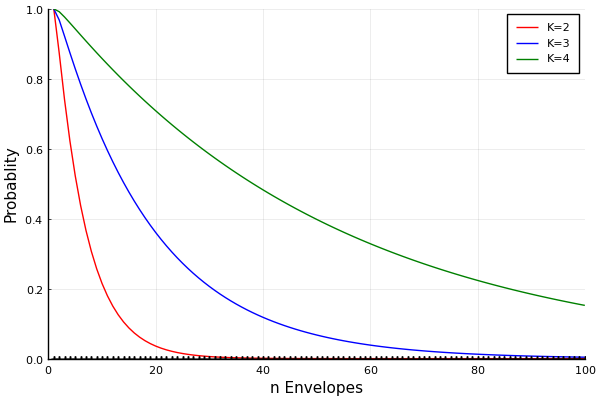

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: You passed a edgecolor/edg

In [2]:
"""
Distributing Letters among Envelopes

This program plots the output of three methods for computing the probability of
the above scenarios.
"""

using Plots ; pyplot()

analytical(n, r) = sum([(-1)^k * binomial(n, k) * (1 - k/n)^r for k in 0:n])

# This simuluation randomly fills a 0-vector of size `n` and sets up a random
# variable which maps whether each index in the vector is at least 1.
function mc(n, r, N)
  count = 0

  for _ in 1:N
    # Why we don't randomly generate a sequence of 1s and 0s and compute the
    # histogram instead is unclear.
    slots = zeros(Int, n)

    # Place `r` identical letters
    for k in 1:r
      slots[rand(1:n)] += 1
    end

    # Check whether each slot is filled.
    if (slots .> 0) == n
      count += 1
    end
  end

  return count / N
end

max_n, N, ks = 100, 10^3, [2, 3, 4]

analytical_soln = [[analytical(big(n), big(k*n)) for n in 1:max_n] for k in ks]
mc_soln = [[mc(n, k*n, N) for n in 1:max_n] for k in ks]

plot(1:max_n, analytical_soln, c=[:red :blue :green],
  label=["K=2" "K=3" "K=4"])

# TODO: There is a bug here with the monte carlo simulation, investigate later.
scatter!(1:max_n, mc_soln, mc=:black, shape=:+,
  xlabel="n Envelopes",
  ylabel="Probablity",
  xlims=(0, max_n),
  ylims=(0, 1),
  label="",
  legend=:topright
)
